In [11]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from helper import *
%matplotlib inline

file = np.genfromtxt("data/Messung - Schlotthauer Nisble.dat").T
t,x,y = file[1],file[2],file[3]

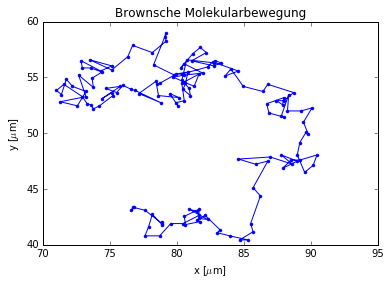

In [20]:
plt.errorbar(x,y,marker=".")
plt.xlabel("x [$\mu$m]")
plt.ylabel("y [$\mu$m]")
plt.title("Brownsche Molekularbewegung")
plt.savefig("Pfad - Schlotthauer Nisble",format="pdf")
plt.show()

In [21]:
dt=np.array([])
dx=np.array([])
dy=np.array([])

for i in range(len(t)-1): 
    dt=np.append( dt,t[i+1]-t[i])
    dx=np.append( dx,x[i+1]-x[i])
    dy=np.append( dy,y[i+1]-y[i])

In [22]:
r_squared=dx**2+dy**2

In [23]:
r_squared_mean=np.mean(r_squared)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))

printResult("R_sq",r_squared_mean,r_squared_mean_std,"")

R_sq: 1.5507406174496645 +/- 0.11661066243705812


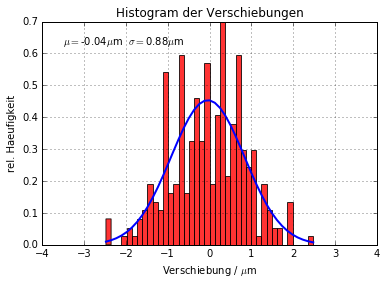

In [24]:
n, bins, patches=plt.hist(np.append(dx,dy), 40, normed=1, facecolor='red', alpha=0.8) 

plt.text(-3.5, .63, '$\mu=$'+str(round(np.mean(np.append(dx,dy)),2))+'$\mu$m'+'  $\sigma=$'+str(round(np.std(np.append(dx,dy)),2))+'$\mu$m')
plt.xlabel('Verschiebung / $\mu$m')
plt.ylabel('rel. Haeufigkeit')
plt.title('Histogram der Verschiebungen')
plt.grid(True)
plt.axis([-4, 4, 0, 0.7])

gauss = mlab.normpdf( bins, np.mean(np.append(dx,dy)), np.std(np.append(dx,dy)))
plt.plot(bins, gauss, 'b-', linewidth=2)
plt.show()

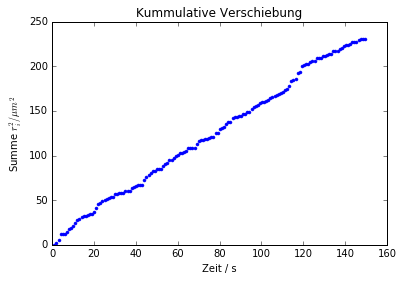

In [28]:
r_kumm=np.cumsum(r_squared)
plt.plot(t[:-1], r_kumm, marker='.', linewidth=0) #t[:-1]-> gesamtes array bis auf das letzte Element
plt.xlabel('Zeit / s')
plt.ylabel('Summe $r_i^2 /\mu m^2$')
plt.title('Kummulative Verschiebung')
plt.show()